# پروژه پیوسته دو 
# مهتا پناهی، سینا ملاابراهیمی

# کتابخانه لازم 

In [38]:
import pandas as pd 
import numpy as np
from sklearn import model_selection
from sklearn import linear_model
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats


# data وارد کردن 


<div dir = 'rtl'>

در اینجا ما دیتا ی مورد نظر را از سایت <code> https://www.kaggle.com/datasets/puxama/bostoncsv </code > استخراج کردیم و توضیحات ستون به شرح زیر است :

crim: نرخ جرم و جنایت در هر نفر.

zn: درصد زمین‌های مسکونی با مساحت بیش از ۲۵۰۰۰ فوت مربع.

indus: درصد زمین‌های غیر مسکونی در هر شهر.

chas: متغیر مجازی (۱ اگر ملک در نزدیکی رودخانه چارلز باشد، ۰ در غیر این صورت).

nox: غلظت اکسید نیتروژن (قسمت در ۱۰ میلیون).

rm: میانگین تعداد اتاق‌ها در هر خانه.

age: درصد واحدهای مسکونی ساخته شده قبل از ۱۹۴۰.

dis: فاصله وزنی تا ۵ مرکز اشتغال در بوستون.

rad: شاخص دسترسی به بزرگراه‌های شعاعی.

tax: نرخ مالیات بر املاک در هر ۱۰,۰۰۰ دلار.

ptratio: نسبت دانش‌آموز به معلم در هر شهر.

black: ۱۰۰۰(Bk - 0.63)^2 که در آن Bk درصد سیاه‌پوستان در هر شهر است.

lstat: درصد جمعیت با وضعیت اقتصادی پایین.

medv: ارزش متوسط خانه‌ها (به هزار دلار).

</div>

In [39]:
df = pd.read_csv("C:/Users/Sina/Downloads/Boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# انتخاب متغیر‍های مستقل برای تحلیل
<div dir = 'rtl'>
ما برای تحلیل مسئله از متغیر های مستقل  <code>crim,indus,nox,age,dis,ptratio,black,lstat </code>  و متغیر پاسخ <code> medv </code>  استفاده میکنیم 
</div>

In [40]:
df_1 = df.iloc[:,[1,3,5,7,8,11,12,13,14]]
df_1

,crim,indus,nox,age,dis,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,54.2,6.0622,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,69.1,2.4786,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,76.7,2.2875,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,91.0,2.1675,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,89.3,2.3889,21.0,393.45,6.48,22.0


# مشاهده خصیصه های متغیرها


In [23]:
df_1.describe()

,crim,indus,nox,age,dis,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,68.574901,3.795043,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,28.148861,2.105710,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,2.900000,1.129600,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,45.025000,2.100175,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,77.500000,3.207450,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,94.075000,5.188425,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,100.000000,12.126500,22.000000,396.900000,37.970000,50.000000


# برازش مدل رگرسیون خطی 
<div dir = 'rtl'>
برای برازش مدل از کتابخانه  <code> sklearn </code> استفاده می کنیم 

 که در فاز اول داده ها را به دو قسمت  <code> train,test </code> تقسیم میکنیم 
 
 در فاز دوم به برازش مدل میپردازیم 

 در فاز سوم به تعیین ضرایب مدل میپردازیم 
 
 در فاز اخر به پیشبینی مقادیر  <code> test </code> می پردازیم 
</div>

# فاز اول 
<div dir = 'rtl'>
در ابتدا ما با استفاده از تابع  <code> model_selection.train_test_split </code> ما یک نمونه تصادفی از دیتا ست گرفته و مدل را به دو قسمت تقسیم میکنیم
</div>

In [57]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(df_1.iloc[:,:8],df_1['medv'],test_size=0.05,random_state=42)

# فاز دوم 
<div dir = 'rtl'>
در این گام ابتدا تابع  <code> linear_model.LinearRegression() </code> را صدا میزنیم و بعد از قسمت یادگیری در فاز اول را روی آن برازش میدهیم
</div>

In [58]:
model = linear_model.LinearRegression().fit(X_train,Y_train)

# فاز سوم 
<div dir = 'rtl'>
در این فاز ما صرایب مدل را دریافت میکنیم که به ترتیب مربوط به عامل اول تا هشتم است .
</div>

In [59]:
model.coef_

array([-4.31036045e-02, -9.38326548e-02, -1.63403178e+01,  2.16300824e-02,
       -1.39907347e+00, -1.14802840e+00,  5.11378174e-03, -8.24282651e-01])

<div dir = 'rtl'>
برای عرض از مبدا کد جداگانه ای دارد 
</div>

In [60]:
print(model.intercept_)

66.43756597445534


# فاز اخر 
<div dir = 'rtl'>
در این مرحله مدل را روی بخش تست دیتا فریم برازش میدهیم تا پیش بینی انجام گیرد
</div>

In [61]:
y_predict = model.predict(X_test)
y_predict

array([31.35046155, 32.45095401, 17.42705894, 26.84897019, 16.08523067,
       24.6067348 , 18.57618996, 11.67576678, 21.72071592, 22.36386666,
       22.55969241, 20.19692459, -1.93415501, 22.573168  , 22.50073427,
       21.5391449 , 19.31982441,  6.09964241, 35.32410745, 15.55241742,
       27.5959788 , 29.3280475 , 12.05149451, 23.90447767, 17.6476882 ,
       17.17361317])

# ساخت مقادیر تکین 

In [62]:
model.singular_

array([2.03816709e+03, 6.04398632e+02, 1.74173630e+02, 1.21004214e+02,
       9.57486544e+01, 4.30353849e+01, 2.68797413e+01, 1.28631469e+00])

# ساخت مانده ها 

In [63]:
e = Y_test-y_predict

# نمایش مانده در کنار پیش بینی و مقدار واقعی 
<div dir = 'rtl'>
در ستون اول مقدار واقعی و در ستون دوم مقدار پیش بینی و در ستون اخر مقدار مانده ها نمایش داده شده است 

</div>

In [64]:
df_3 = pd.DataFrame(Y_test)
df_3['y_pred'] = y_predict
df_3['e'] = df_3['medv']-df_3['y_pred']
df_3 =df_3.reset_index(drop=True)
df_3 = df_3.rename(columns={'medv':'Y_test'})
df_3

,Y_test,y_pred,e
0,23.6,31.350462,-7.750462
1,32.4,32.450954,-0.050954
2,13.6,17.427059,-3.827059
3,22.8,26.848970,-4.048970
4,16.1,16.085231,0.014769
5,20.0,24.606735,-4.606735
6,17.8,18.576190,-0.776190
7,14.0,11.675767,2.324233
8,19.6,21.720716,-2.120716
9,16.8,22.363867,-5.563867


# رسم نمودار مقدار پیش بینی در برابر مقدار واقعی

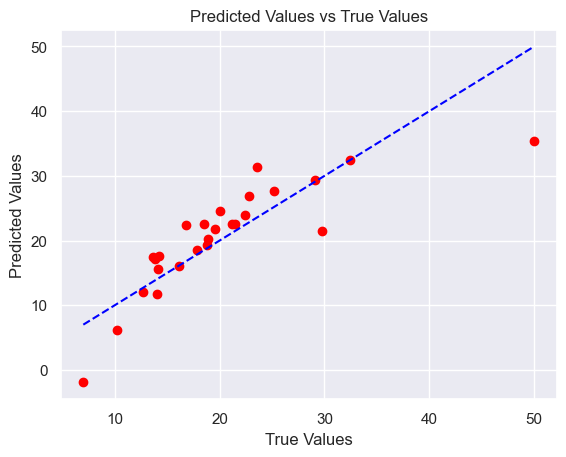

In [65]:
sns.set_theme()
plt.scatter(df_3['Y_test'], df_3['y_pred'], color='red')
plt.plot([min(df_3['Y_test']), max(df_3['Y_test'])],[min(df_3['Y_test']), max(df_3['Y_test'])], color='blue', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs True Values')
plt.show()

# بررسی صحت مدل

In [66]:
mse = mean_squared_error(Y_test,y_predict)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 22.64884280229196


In [67]:
r2 = r2_score(Y_test, y_predict)
print('r2_score :',r2)

r2_score : 0.6776465710042816


# statsmodels برازش مدل با استفاده از کتابخانه 

In [69]:
y = df_1['medv']
X = df_1.drop(columns=['medv'])
X = sm.add_constant(X)
model_3 = sm.OLS(y, X).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):          1.09e-109
Time:                        09:32:48   Log-Likelihood:                -1571.0
No. Observations:                 506   AIC:                             3160.
Df Residuals:                     497   BIC:                             3198.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.8458      3.852     17.353      0.0

# بررسی نرمالیتی مانده ها 
<div dir = 'rtl'>
 با توجه به مرحله قبل حال به بررسی نرمالیتی مانده ها می پردازیم
 
آزمون مورد استفاده ما آزمون کلموگروف اسمیرنوف استفاده میکنیم 

اگر مقدار <code> p_value </code> بیشتر از 0.05 باشد نرمالیتی داده ها تایید میشود 
</code>

In [70]:
stats.kstest(df_3['e'],'norm')

KstestResult(statistic=np.float64(0.4411329708567787), pvalue=np.float64(3.986369825549642e-05), statistic_location=np.float64(-1.296924588684739), statistic_sign=np.int8(1))

<div dir = 'rtl'>
با توجه به توضیحات بالا فرض نرمالیتی رد میشود 
</div>

# بررسی همگنی واریانس های مانده ها 
<div dir = "rtl">
<code>het_breuschpagan</code> آزمون یک آزمون آماری است که برای بررسی وجود <code>heteroscedastic</code> یا ناهمسانی واریانس در یک مدل رگرسیون استفاده میشود .این آزمون برابر با همسانی واریانس قرار میدهد وو فرضیه مقابل را برابر با وجود رابطه بین واریانس خطاها و متغیرهای توضیحی قرار می دهد. اگر مقدار p-value آزمون کمتر از سطح معناداری باشد، فرضیه صفر رد می شود و نتیجه می گیریم که هتروسکداستیسیته وجود دارد. این آزمون دو نسخه دارد: نسخه اصلی که فرض می کند خطاها نرمال هستند و نسخه روباست  <code>(robust)</code> که فرض می کند خطاها مستقل و یکسان توزیع هستند. 
که در مدل ما همگنی واریانس پذیرفته میشود 
</div>

In [71]:
X = df_1.iloc[:,:8]
X['intercept'] = model.intercept_
X
X = X.iloc[Y_test.index,[8,0,1,2,3,4,5,6,7]]
_, p_value, _, _ = het_breuschpagan(e, X)
if p_value < 0.05:
    print("The residuals are heteroscedastic.")
else:
    print("The residuals are homoscedastic.")

The residuals are homoscedastic.


# رسم نمودار خود همبستگی داده ها 

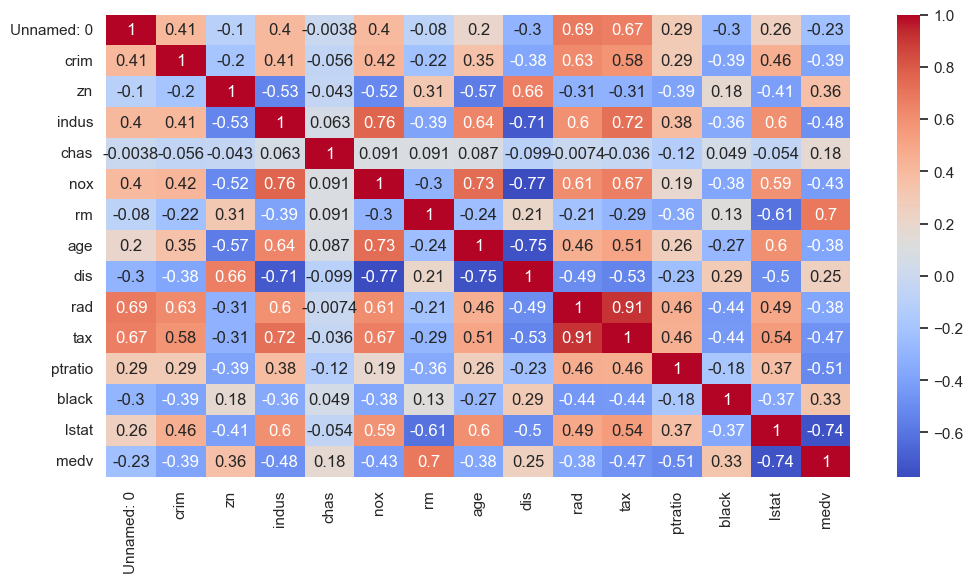

In [72]:
figure = plt.subplots(figsize = (12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

# نمایش عامل تورم واریانس 
<div dir = 'rtl'>
عامل تورم واریانس (Variance Inflation Factor یا VIF) یک شاخص آماری است که شدت هم‌خطی چندگانه را در تحلیل رگرسیون کمترین مربعات معمولی ارزیابی می‌کند. به بیان ساده، این شاخص 


نشان می‌دهد که یک متغیر مستقل تا چه اندازه تحت تأثیر دیگر متغیرهای مستقل قرار دارد و رفتار آن تغییر می‌کند.

به عنوان یک قاعده تجربی، اگر مقدار VIF بزرگتر از ۵ باشد، هم‌خطی بالا است و ممکن است نتایج تحلیل رگرسیون را تحت تأثیر قرار دهد. این شاخص به محققان کمک می‌کند تا متغیرهایی که ممکن است باعث هم‌خطی شوند را شناسایی و مدیریت کنند. 
</div>

In [73]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,intercept,758.232260
1,crim,12.553876
2,indus,2.720382
3,nox,5.057282
4,age,4.594024
5,dis,3.747718
6,ptratio,2.030086
7,black,9.045263
8,lstat,5.692713


<div dir = 'rtl'>
مشاهده میشود که همخطی محسوسی بین عوامل وجود دارد پس به سراغ متد  <code>PCA </code>میرویم 
</div>

 # PCA آماده سازی داده برای متد 

In [74]:
df_1_standardized = (df_1.iloc[:,:8].astype('float') - df_1.iloc[:,:8].astype('float').mean()) / df_1.iloc[:,:8].astype('float').std()
df_1_standardized


,crim,indus,nox,age,dis,ptratio,black,lstat
0,-0.419367,-1.286636,-0.144075,-0.119895,0.140075,-1.457558,0.440616,-1.074499
1,-0.416927,-0.592794,-0.739530,0.366803,0.556609,-0.302794,0.440616,-0.491953
2,-0.416929,-0.592794,-0.739530,-0.265549,0.556609,-0.302794,0.396035,-1.207532
3,-0.416338,-1.305586,-0.834458,-0.809088,1.076671,0.112920,0.415751,-1.360171
4,-0.412074,-1.305586,-0.834458,-0.510674,1.076671,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...
501,-0.412820,0.115624,0.157968,0.018654,-0.625178,1.175303,0.386834,-0.417734
502,-0.414839,0.115624,0.157968,0.288648,-0.715931,1.175303,0.440616,-0.500355
503,-0.413038,0.115624,0.157968,0.796661,-0.772919,1.175303,0.440616,-0.982076
504,-0.407361,0.115624,0.157968,0.736268,-0.667776,1.175303,0.402826,-0.864446


 # PCA پیاده سازی متد 
 <div dir = 'rtl'>
برای این متد نیاز مند آنیم که توضیح واریانس را روی 0.95 درصد نگه داریم 
</div>

In [76]:
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(df_1_standardized)

# تقسیم داده  و برازش مدل 

In [78]:
X_train_1, X_test_1, y_train_1, y_test_1 = model_selection.train_test_split(X_pca, df_1['medv'], test_size=0.2, random_state=42)

In [79]:
model_PCA = linear_model.LinearRegression()
model_PCA.fit(X_train_1, y_train_1)

LinearRegression()

# PCA صحت مدل 

In [80]:
y_pred_1 = model_PCA.predict(X_test_1)
mse = mean_squared_error(y_test_1, y_pred_1)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 28.49221895062468


# توضیحات مربوط به عامل ها 

In [81]:
explained_variance = pca.explained_variance_ratio_
components = pca.components_

print(explained_variance,":نسبت واریانس توضیح داده شده ")
print( components,": مولفه‌های اصلی")

[0.53996934 0.1275181  0.10703368 0.07425619 0.05892284 0.04309979] :نسبت واریانس توضیح داده شده 
[[ 0.29097033  0.41463305  0.42027762  0.39945251 -0.40162222  0.21212876
  -0.24719864  0.37391702]
 [ 0.43525885 -0.09361808 -0.27840223 -0.29350503  0.33221937  0.58094363
  -0.41052462  0.14743375]
 [-0.25638686  0.12287574 -0.10356807  0.10440544 -0.03276857  0.67680236
   0.65686946  0.08323333]
 [ 0.78481228 -0.13701353 -0.01691965  0.00103906 -0.01210714 -0.22783599
   0.55768468  0.04406353]
 [-0.19133819 -0.15937519 -0.08280226  0.11551015  0.3546302  -0.23247513
   0.07247124  0.85599713]
 [-0.0202211   0.6645216   0.22935424 -0.6461876   0.2010611  -0.13355631
   0.1420186   0.09699605]] : مولفه‌های اصلی


In [82]:
pca.explained_variance_

array([4.31975472, 1.02014478, 0.85626941, 0.59404955, 0.47138271,
       0.34479829])

In [83]:
print(pca.noise_variance_)

0.19680026958969976


<div dir = 'rtl'>
 این مقدار نشان‌دهنده‌ی میزان واریانس داده‌هایی است که توسط مولفه‌های اصلی توضیح داده نمی‌شوند و به عنوان نویز در نظر گرفته می‌شوند. به عبارت دیگر، این واریانس نشان‌دهنده‌ی بخشی از داده‌هاست که توسط مولفه‌های اصلی قابل توضیح نیست و به عنوان نویز در داده‌ها وجود دارد.
</div>


# رگرسیون رو اثر های اصلی 

In [84]:
model_PCA.coef_

array([-2.61475581, -3.37352795, -1.31684509,  0.47889957, -5.19554757,
       -1.95478961])